<a href="https://colab.research.google.com/github/matthewpecsok/4482_fall_2022/blob/main/tutorials/4482_classification_SVC_titanic_cleaned.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Welcome to the Support Vector classification notebook. Please start with the MLP notebook if you have not already. 

## Setup

In [17]:
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix,\
 recall_score, precision_score, f1_score, accuracy_score, make_scorer,\
  precision_recall_fscore_support

from sklearn.model_selection import train_test_split, cross_validate
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import random

import warnings
warnings.filterwarnings('ignore')
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Data

In [2]:
titanic_cleaned = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/6482_to_4482/titanic_cleaned.csv').drop('Cabin', axis=1) # drop cabin

In [3]:
titanic_cleaned.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [4]:
titanic_cleaned['Pclass'] = titanic_cleaned.Pclass.astype(str)

In [5]:
titanic_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 714 entries, 0 to 713
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  714 non-null    int64  
 1   Pclass    714 non-null    object 
 2   Sex       714 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     714 non-null    int64  
 5   Parch     714 non-null    int64  
 6   Fare      714 non-null    float64
 7   Embarked  714 non-null    object 
dtypes: float64(2), int64(3), object(3)
memory usage: 44.8+ KB


In [6]:
y = titanic_cleaned.pop('Survived')

In [7]:
X = pd.get_dummies(titanic_cleaned)
print(X.shape, y.shape)

(714, 13) (714,)


In [8]:
X.head()

,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Embarked_missing
0,22.0,1,0,7.2500,0,0,1,0,1,0,0,1,0
1,38.0,1,0,71.2833,1,0,0,1,0,1,0,0,0
2,26.0,0,0,7.9250,0,0,1,1,0,0,0,1,0
3,35.0,1,0,53.1000,1,0,0,1,0,0,0,1,0
4,35.0,0,0,8.0500,0,0,1,0,1,0,0,1,0


## SVC Modeling

### GriSearchCV 

Exploring multiple SVC models using grid search

In [9]:
from sklearn.model_selection import GridSearchCV
parameters = {'C':[5,10,15,20,30,40,50,60,70,80,90,100],
              'kernel':['rbf','poly','sigmoid']
              }
svc = SVC(random_state=42)
clf = GridSearchCV(svc, parameters,scoring='f1')
clf.fit(X, y)

clf.score(X, y)


0.7539267015706805

In [10]:
clf.best_estimator_

SVC(C=100, random_state=42)

In [11]:
grid_search_df = pd.DataFrame(clf.cv_results_)
print(grid_search_df.shape) 
grid_search_df.sort_values('mean_test_score',ascending=False)#.head() #only taking the top five rows as this is a large dataframe sort by the best f1 scores found

(36, 15)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
33,0.025050,0.001231,0.006497,0.000365,100,rbf,"{'C': 100, 'kernel': 'rbf'}",0.698413,0.782609,0.722689,0.596154,0.771930,0.714359,0.066736,1
18,0.022927,0.001128,0.006677,0.000415,50,rbf,"{'C': 50, 'kernel': 'rbf'}",0.621849,0.786325,0.743802,0.601942,0.796610,0.710105,0.082361,2
30,0.025833,0.002918,0.006656,0.000766,90,rbf,"{'C': 90, 'kernel': 'rbf'}",0.671875,0.782609,0.722689,0.596154,0.771930,0.709051,0.068816,3
24,0.022999,0.001126,0.006365,0.000169,70,rbf,"{'C': 70, 'kernel': 'rbf'}",0.666667,0.782609,0.722689,0.596154,0.771930,0.708010,0.069408,4
21,0.022158,0.000789,0.006266,0.000115,60,rbf,"{'C': 60, 'kernel': 'rbf'}",0.644628,0.786325,0.733333,0.596154,0.771930,0.706474,0.073997,5
27,0.024104,0.001843,0.006704,0.000691,80,rbf,"{'C': 80, 'kernel': 'rbf'}",0.651163,0.782609,0.722689,0.596154,0.771930,0.704909,0.071500,6
15,0.021346,0.000569,0.006898,0.000272,40,rbf,"{'C': 40, 'kernel': 'rbf'}",0.553571,0.793103,0.728814,0.607843,0.786325,0.693931,0.096644,7
12,0.021470,0.001019,0.007090,0.000353,30,rbf,"{'C': 30, 'kernel': 'rbf'}",0.466019,0.770642,0.703704,0.640777,0.810811,0.678391,0.120998,8
9,0.020190,0.000738,0.006832,0.000345,20,rbf,"{'C': 20, 'kernel': 'rbf'}",0.428571,0.679612,0.625000,0.583333,0.740000,0.611303,0.105442,9
6,0.023088,0.003683,0.007433,0.000989,15,rbf,"{'C': 15, 'kernel': 'rbf'}",0.395833,0.673267,0.595745,0.589474,0.673684,0.585601,0.101562,10


visualize the f1 score by hyperparameter C

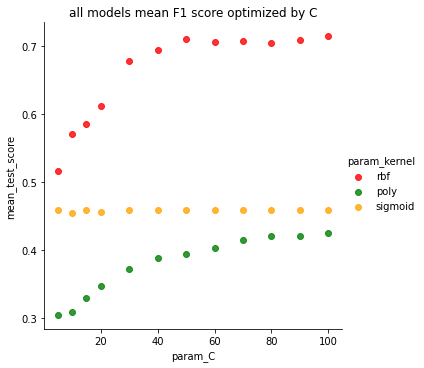

In [13]:
colors = {'sigmoid':'orange','rbf':'red', 'poly':'green' }


sns.lmplot('param_C', 'mean_test_score', data=grid_search_df,palette=colors, hue='param_kernel', fit_reg=False)
plt.title("all models mean F1 score optimized by C")
plt.show()

# Notice how the poly kernel is substantially worse than the rbf kernel. 
# on the rb kernel we seem to maximize the f1 with a C of 60


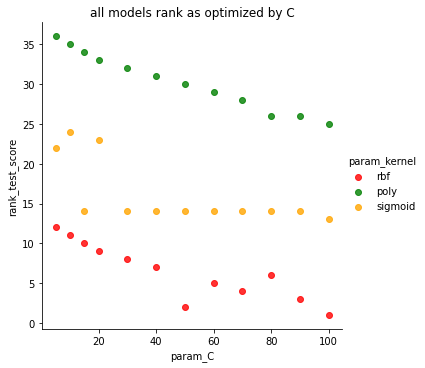

In [14]:
sns.lmplot('param_C', 'rank_test_score', data=grid_search_df,palette=colors, hue='param_kernel', fit_reg=False)
plt.title("all models rank as optimized by C")
plt.show()

visualize the grid search rank by C
in this case lower is better (rank 1 is the best rank)

In [15]:
pd.DataFrame(cross_validate(clf, 
               X,
               y,
               cv = 3,
               return_train_score=True,
               scoring=['accuracy','recall','precision','f1']))

,fit_time,score_time,test_accuracy,train_accuracy,test_recall,train_recall,test_precision,train_precision,test_f1,train_f1
0,5.059269,0.009303,0.722689,0.831933,0.625000,0.752577,0.666667,0.820225,0.645161,0.784946
1,4.838739,0.009655,0.785714,0.806723,0.742268,0.735751,0.734694,0.775956,0.738462,0.755319
2,7.096374,0.014786,0.760504,0.794118,0.639175,0.725389,0.738095,0.756757,0.685083,0.740741


To conclude we trained 36 models and achieved substantially better performance on some models compared to others. our best performing model achieved an F1 score of 71.5% compared to an F1 of 29.6%. That's an increase of 41.9%

What if you have potentially thousands of combinations? It may not be practical to run all the models. In that case randomizing your search and randomly picking combinations from the total number of possible models and selecting the best estimator is a good strategy. For example: in the decision tree model we have a parameter cc_alpha, which has an infinite number of possible values to choose from one cannot simply enter all the possible values so one must sample a subset of them from a uniform distribution. 

In [18]:
parameters = {'C':[5,10,15,20,30,40,50,60,70,80,90,100],
              'kernel':['rbf','poly','sigmoid']
              }
svc = SVC(random_state=42)
clf = RandomizedSearchCV(svc, parameters,scoring='f1')
clf.fit(X, y)

clf.score(X, y)

0.7539267015706805

In [19]:
grid_search_df = pd.DataFrame(clf.cv_results_)
print(grid_search_df.shape) 
grid_search_df.sort_values('mean_test_score',ascending=False)#.head() #only taking the top five rows as this is a large dataframe sort by the best f1 scores found

(10, 15)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_kernel,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
7,0.024956,0.001252,0.006227,0.000159,rbf,100,"{'kernel': 'rbf', 'C': 100}",0.698413,0.782609,0.722689,0.596154,0.771930,0.714359,0.066736,1
3,0.024255,0.002107,0.006191,0.000176,rbf,90,"{'kernel': 'rbf', 'C': 90}",0.671875,0.782609,0.722689,0.596154,0.771930,0.709051,0.068816,2
5,0.024244,0.002120,0.006484,0.000415,rbf,80,"{'kernel': 'rbf', 'C': 80}",0.651163,0.782609,0.722689,0.596154,0.771930,0.704909,0.071500,3
2,0.021324,0.000529,0.006639,0.000149,rbf,40,"{'kernel': 'rbf', 'C': 40}",0.553571,0.793103,0.728814,0.607843,0.786325,0.693931,0.096644,4
6,0.014575,0.000758,0.005698,0.000556,sigmoid,30,"{'kernel': 'sigmoid', 'C': 30}",0.444444,0.342342,0.530973,0.472441,0.504505,0.458941,0.065196,5
0,0.324212,0.133759,0.005290,0.000181,poly,80,"{'kernel': 'poly', 'C': 80}",0.238806,0.604651,0.338028,0.421053,0.500000,0.420508,0.126528,6
8,0.372383,0.157697,0.005166,0.000319,poly,90,"{'kernel': 'poly', 'C': 90}",0.238806,0.604651,0.338028,0.421053,0.500000,0.420508,0.126528,6
1,0.142397,0.065122,0.005258,0.000266,poly,30,"{'kernel': 'poly', 'C': 30}",0.215385,0.560976,0.309859,0.342857,0.432432,0.372302,0.117135,8
4,0.094568,0.047025,0.005306,0.000325,poly,20,"{'kernel': 'poly', 'C': 20}",0.158730,0.543210,0.285714,0.342857,0.410959,0.348294,0.127906,9
9,0.054511,0.039210,0.004945,0.000068,poly,10,"{'kernel': 'poly', 'C': 10}",0.158730,0.525000,0.260870,0.238806,0.366197,0.309921,0.126292,10


In [ ]:
!cp "/content/drive/MyDrive/Colab Notebooks/4482_classification_SVC_titanic_cleaned.ipynb" ./
!jupyter nbconvert --to html "4482_classification_SVC_titanic_cleaned.ipynb"